In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States..csv')
df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2/21/2021,1/1/2020,2/20/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,284,292,NaN
1,2/21/2021,1/1/2020,2/20/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,330","1,352",NaN
2,2/21/2021,1/1/2020,2/20/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"3,620","3,698",NaN
3,2/21/2021,1/1/2020,2/20/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"10,765","11,042",NaN
4,2/21/2021,1/1/2020,2/20/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"27,513","28,161",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211135,2/21/2021,2/1/2021,2/20/2021,By Month,"2,021",2.0,Puerto Rico,COVID-19,COVID-19,U071,65-74,10,10,NaN
211136,2/21/2021,2/1/2021,2/20/2021,By Month,"2,021",2.0,Puerto Rico,COVID-19,COVID-19,U071,75-84,12,12,NaN
211137,2/21/2021,2/1/2021,2/20/2021,By Month,"2,021",2.0,Puerto Rico,COVID-19,COVID-19,U071,85+,NaN,NaN,One or more data cells have counts between 1-9...
211138,2/21/2021,2/1/2021,2/20/2021,By Month,"2,021",2.0,Puerto Rico,COVID-19,COVID-19,U071,Not stated,0,0,NaN


In [3]:
df = pd.read_csv('Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States..csv')
df = df[['Group','Condition','COVID-19 Deaths', 'Age Group', 'State']]
df = df[df['Group'] == 'By Total']
df = df.dropna()
condition_lst = df['Condition'].unique()
sum_lst = []

for condition in condition_lst:

    subset = df[(df['Condition'] == condition) & (df['Age Group'] == 'All Ages') & (df['State'] == 'United States')]
    subset['COVID-19 Deaths'] = list(map(lambda x: int(x.replace(',', '')), subset['COVID-19 Deaths']))
    death_sum = subset['COVID-19 Deaths'].sum()
    
    sum_lst.append(death_sum)
sum_lst

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[210011,
 41546,
 49403,
 172969,
 9988,
 17981,
 93250,
 50891,
 55176,
 33657,
 35085,
 22752,
 28076,
 42760,
 21194,
 74350,
 17770,
 18154,
 49312,
 43793,
 8964,
 173096,
 468643]

In [28]:
# all the comorbidities that need to be observed
import numpy as np
conditions = df['Condition'].unique()
conditions = conditions.tolist()
print(conditions)

['Influenza and pneumonia', 'Chronic lower respiratory diseases', 'Adult respiratory distress syndrome', 'Respiratory failure', 'Respiratory arrest', 'Other diseases of the respiratory system', 'Hypertensive diseases', 'Ischemic heart disease', 'Cardiac arrest', 'Cardiac arrhythmia', 'Heart failure', 'Cerebrovascular diseases', 'Other diseases of the circulatory system', 'Sepsis', 'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease', 'Vascular and unspecified dementia', 'Renal failure', 'Intentional and unintentional injury, poisoning, and other adverse events', 'All other conditions and causes (residual)', 'COVID-19']


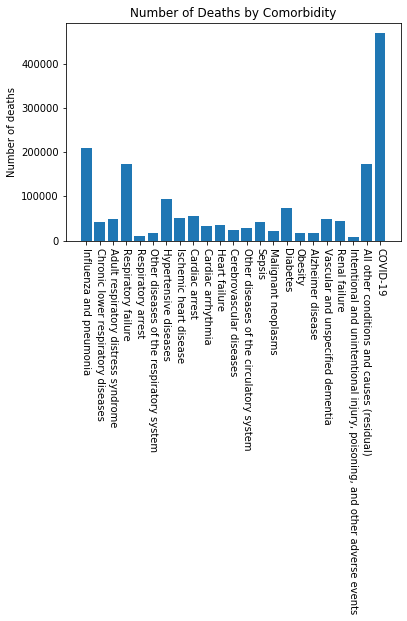

In [29]:
plt.bar(condition_lst, sum_lst) # Note: COVID-19 in graph refers to all other comorbidites combined
plt.xticks(rotation = -90)
plt.ylabel('Number of deaths')
plt.title('Number of Deaths by Comorbidity')
plt.show()

In [33]:
conditions.remove(conditions[-1]) # removed COVID-19 from condition list
condition_no_covid = conditions
print(condition_no_covid)

['Influenza and pneumonia', 'Chronic lower respiratory diseases', 'Adult respiratory distress syndrome', 'Respiratory failure', 'Respiratory arrest', 'Other diseases of the respiratory system', 'Hypertensive diseases', 'Ischemic heart disease', 'Cardiac arrest', 'Cardiac arrhythmia', 'Heart failure', 'Cerebrovascular diseases', 'Other diseases of the circulatory system', 'Sepsis', 'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease', 'Vascular and unspecified dementia', 'Renal failure', 'Intentional and unintentional injury, poisoning, and other adverse events', 'All other conditions and causes (residual)']


In [39]:
sum_lst.remove(sum_lst[-1]) # removed death count associated with COVID-19
sum_no_covid = sum_lst
print(sum_no_covid)

[210011, 41546, 49403, 172969, 9988, 17981, 93250, 50891, 55176, 33657, 35085, 22752, 28076, 42760, 21194, 74350, 17770, 18154, 49312, 43793, 8964, 173096]


In [58]:
# Getting top 5 contributing comorbidities
data = {'Condition': condition_no_covid, 'Number of Deaths': sum_no_covid}
df2 = pd.DataFrame(data)
top_5 = df2.nlargest(5, 'Number of Deaths')
top_5.set_index('Condition', inplace=True)
print(top_5)

                                            Number of Deaths
Condition                                                   
Influenza and pneumonia                               210011
All other conditions and causes (residual)            173096
Respiratory failure                                   172969
Hypertensive diseases                                  93250
Diabetes                                               74350


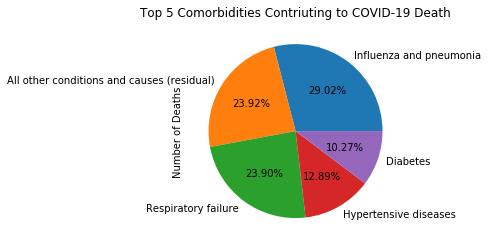

In [76]:
# plotting top 5 comorbidities that contribute to death
plot = top_5.plot.pie(y='Number of Deaths', autopct='%1.2f%%', legend=False, 
                      title='Top 5 Comorbidities Contriuting to COVID-19 Death')

Text(0.5, 1.0, 'Comorbidities and Number of Deaths')

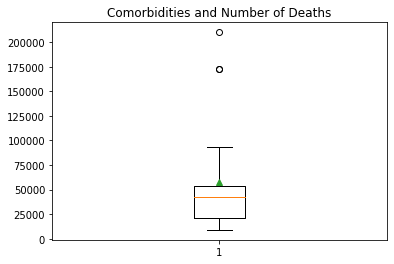

In [71]:
# displaying box and whisker plot of all conditions
plt.boxplot(sum_no_covid, showmeans=True)
plt.title('Comorbidities and Number of Deaths')